# Sentiment Analysis with Twitter
### And Application on Predicting the Market
Data used in this analysis is [Tweets about the Top Companies from 2015 to 2020](https://www.kaggle.com/datasets/omermetinn/tweets-about-the-top-companies-from-2015-to-2020) from Kaggle. Sentiment analysis tool includes Vader sentiment analysis from NLTK and supervised machine learning algorithm include logistic regression, Naive Bayes, Support Vector Machine and Random Forest.

## Data Preparation and Cleaning


In [1]:
import pandas as pd

First, load the data to dataframe

In [2]:
company_tweets = pd.read_csv('Company_Tweet.csv')
tweet = pd.read_csv('Tweet.csv')

In [3]:
company_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4336445 entries, 0 to 4336444
Data columns (total 2 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   tweet_id       int64 
 1   ticker_symbol  object
dtypes: int64(1), object(1)
memory usage: 66.2+ MB


In [4]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3717964 entries, 0 to 3717963
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   tweet_id     int64 
 1   writer       object
 2   post_date    int64 
 3   body         object
 4   comment_num  int64 
 5   retweet_num  int64 
 6   like_num     int64 
dtypes: int64(5), object(2)
memory usage: 198.6+ MB


Noticed company_tweets dataframe has more entries than tweet dataframe, might due to one tweet can be associated with multiple companies.

In [5]:
company_tweets.head()

,tweet_id,ticker_symbol
0,550803612197457920,AAPL
1,550803610825928706,AAPL
2,550803225113157632,AAPL
3,550802957370159104,AAPL
4,550802855129382912,AAPL


In [6]:
tweet.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1


Join two dataframes to combine the information

In [7]:
tweets = pd.merge(company_tweets, tweet, on='tweet_id')

Convert the post_date column to a format readable by human

In [8]:
tweets.post_date = pd.to_datetime(tweets.post_date,unit='s')
tweets

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
0,550803612197457920,AAPL,SentiQuant,2015-01-01 23:59:49,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
1,550803612197457920,AMZN,SentiQuant,2015-01-01 23:59:49,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
2,550803610825928706,AAPL,SentiQuant,2015-01-01 23:59:48,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
3,550803610825928706,GOOGL,SentiQuant,2015-01-01 23:59:48,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
4,550803610825928706,AMZN,SentiQuant,2015-01-01 23:59:48,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
...,...,...,...,...,...,...,...,...
4336440,1212158772015034369,TSLA,StockJoke,2019-12-31 23:49:06,"I'm getting wasted on NYE, and thanks to @NHTS...",0,0,0
4336441,1212159099632267268,TSLA,sweetog76,2019-12-31 23:50:24,$TSLA Very Interesting dude:,0,0,0
4336442,1212159184931717120,TSLA,MelaynaLokosky,2019-12-31 23:50:45,If only 2020 brought more self-awareness to Te...,0,1,0
4336443,1212159838882533376,TSLA,ShortingIsFun,2019-12-31 23:53:21,In 2020 I may start Tweeting out positive news...,0,0,1


In [9]:
tweets[tweets.post_date>'2020-01-01']

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num


It looks like the data is from the begining of 2015 to the end of 2019 contrary to the title on Kaggle says it's from 2015 to 2020.

Since both GOOG and GOOGL are Google, they will be combined.

In [10]:
tweets.ticker_symbol.replace('GOOGL','GOOG',inplace=True)

In [11]:
tweets.isna().sum()

tweet_id             0
ticker_symbol        0
writer           55919
post_date            0
body                 0
comment_num          0
retweet_num          0
like_num             0
dtype: int64

Missing writers won't be worried about since tweet body, ticker_symbol, and post_date are not missing.

Tweet_id is no longer needed after merge, and it will be droped.

In [12]:
tweets.drop('tweet_id',axis=1, inplace=True)

Lastly, drop duplicate rows after some basic cleaning.

In [13]:
tweets.drop_duplicates(inplace=True)

In [14]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4288363 entries, 0 to 4336444
Data columns (total 7 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ticker_symbol  object        
 1   writer         object        
 2   post_date      datetime64[ns]
 3   body           object        
 4   comment_num    int64         
 5   retweet_num    int64         
 6   like_num       int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 261.7+ MB


## Exploratory Analysis and Visualization

Some quick visualizations will be presented in this section before Sentiment Analysis is performed.



In [15]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

What company is the most mentioned on Tweeter?

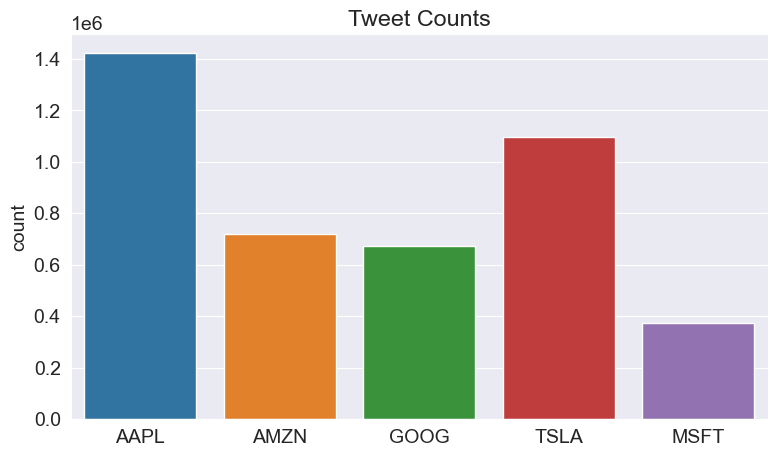

In [16]:
ax = sns.countplot(data = tweets,x = 'ticker_symbol')
ax.set_title('Tweet Counts')
ax.set_xlabel('');

Check out the trend by year.

In [17]:
tweets['year']=pd.DatetimeIndex(tweets.post_date).year

In [18]:
hot_company_by_year = tweets.groupby(['ticker_symbol','year']).body.count()
hot_company_by_year = hot_company_by_year.reset_index()
hot_company_by_year

,ticker_symbol,year,body
0,AAPL,2015,360089
1,AAPL,2016,405626
2,AAPL,2017,219039
3,AAPL,2018,223129
4,AAPL,2019,217002
5,AMZN,2015,113689
6,AMZN,2016,141198
7,AMZN,2017,156624
8,AMZN,2018,163735
9,AMZN,2019,143435


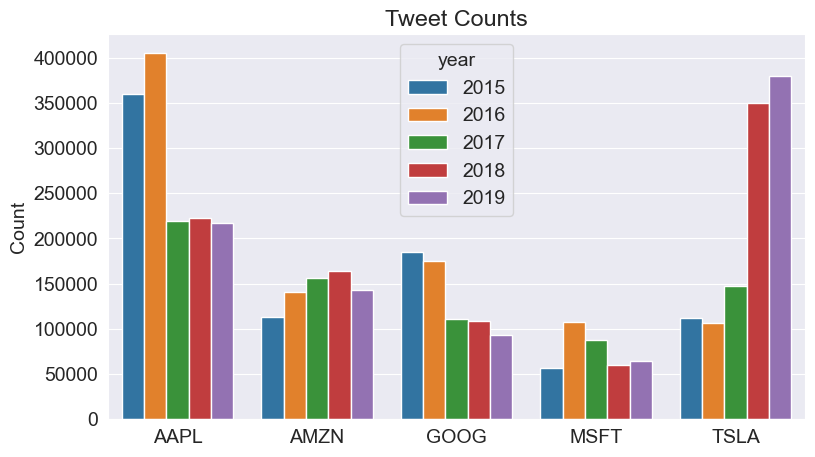

In [19]:
ax = sns.barplot(data=hot_company_by_year,x='ticker_symbol',y = 'body',hue = 'year')
ax.set_xlabel('')
ax.set_ylabel('Count')
ax.set_title('Tweet Counts');

Apple finally started selling iPhones with a "big" 4.7" screen at the end of 2014 and hasn't changed it for couple years. While Tesla rolls the first Model 3 off the line in middle of 2017.

Maybe their stock trading volume followed the same pattern?

In [20]:
tickers = tweets.ticker_symbol.unique().tolist()

Google is a special case here, adding volume together for two tickers.

In [21]:
import yfinance as yf
volumes = yf.download(tickers+['GOOGL'],start='2015-01-01',end='2019-12-31')['Volume']
volumes['GOOG'] = volumes.GOOG+volumes.GOOGL
volumes.drop('GOOGL',axis=1,inplace=True)
volumes

[*********************100%***********************]  6 of 6 completed


,AAPL,AMZN,GOOG,MSFT,TSLA
Date,,,,,
2015-01-02 00:00:00-05:00,212818400,55664000,55431268,27913900,71466000
2015-01-05 00:00:00-05:00,257142000,55484000,82378796,39673900,80527500
2015-01-06 00:00:00-05:00,263188400,70380000,112454800,36447900,93928500
2015-01-07 00:00:00-05:00,160423600,52806000,88219082,29114100,44526000
2015-01-08 00:00:00-05:00,237458000,61768000,140125641,29645200,51637500
...,...,...,...,...,...
2019-12-23 00:00:00-05:00,98572000,42728000,37598000,17718200,199794000
2019-12-24 00:00:00-05:00,48478800,17626000,20418000,8989200,120820500
2019-12-26 00:00:00-05:00,93121200,120108000,37012000,14520600,159508500


In [22]:
volumes['year']=pd.DatetimeIndex(volumes.index).year
volumes_year = volumes.groupby('year').sum().unstack().reset_index()
volumes_year.columns = ['ticker','year','volume']

In [23]:
volumes_year

,ticker,year,volume
0,AAPL,2015,52264199600
1,AAPL,2016,38729911200
2,AAPL,2017,27243106000
3,AAPL,2018,34156144800
4,AAPL,2019,28154137200
5,AMZN,2015,19142040000
6,AMZN,2016,20775126000
7,AMZN,2017,17654108000
8,AMZN,2018,28357952000
9,AMZN,2019,19442872000


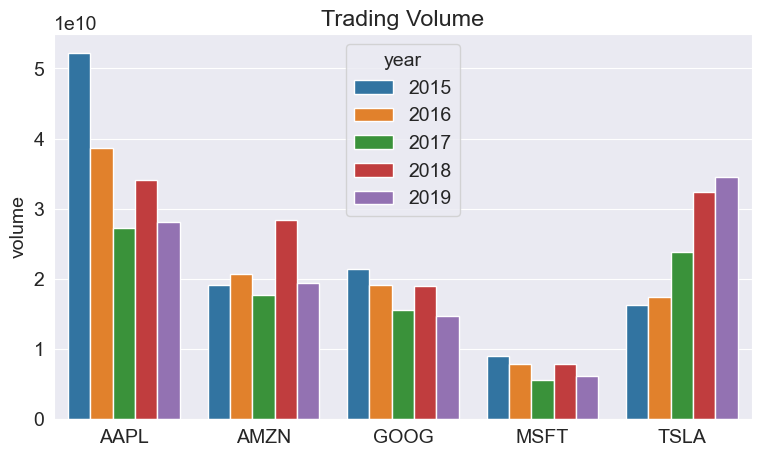

In [24]:
ax = sns.barplot(data=volumes_year,x = 'ticker',y='volume',hue='year');
ax.set_xlabel('')
ax.set_title('Trading Volume');

The trading volume looks similar to the tweet counts. 

Plotting them together.

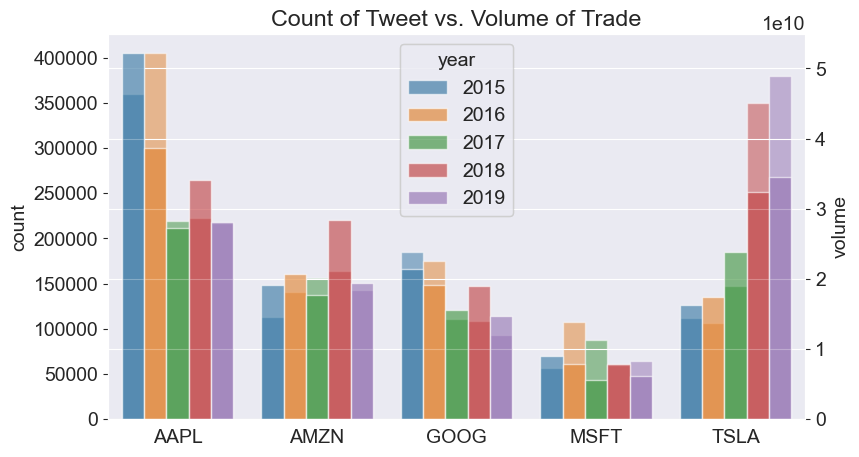

In [25]:
ax = sns.barplot(data=hot_company_by_year,x='ticker_symbol',y = 'body',hue = 'year',alpha=0.5)
ax2=ax.twinx()
sns.barplot(data=volumes_year,x = 'ticker',y='volume',hue='year',alpha=0.6, ax=ax2)
ax.set_xlabel('')
ax.set_title('Count of Tweet vs. Volume of Trade')
ax.grid(False)
ax.set_ylabel('count');

Although the trading volume cannot be compared directly between different companies. The trend of trading volume for each company does follow their tweet counts across years.

### Sentiment Analysis with VADER


First we use VADER (Valence Aware Dictionary and sEntiment Reasoner), a lexicon and rule-based sentiment analysis tool that can quickly assign sentiment scores to tweets.

VADER is based on the model proposed by Hutto and Gilbert (2014) and trained on social media text. 

It can capture the nuances of sentiments expressed online, such as sarcasm. Therefore, it is suitable for analyzing tweets in this project.

In [26]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [27]:
analyzer = SentimentIntensityAnalyzer()

Remove the '#' so analyzer will analyze tag as well

In [30]:
tweets['vader']=tweets.body.apply(lambda x: analyzer.polarity_scores(x.replace('#',' '))['compound'])

VADER provide a score between -1 and 1 for every tweet. 1 is extremely positive and -1 is the opposite.

In [31]:
tweets_year_vader = tweets.groupby(['ticker_symbol','year'])['vader'].mean().reset_index()

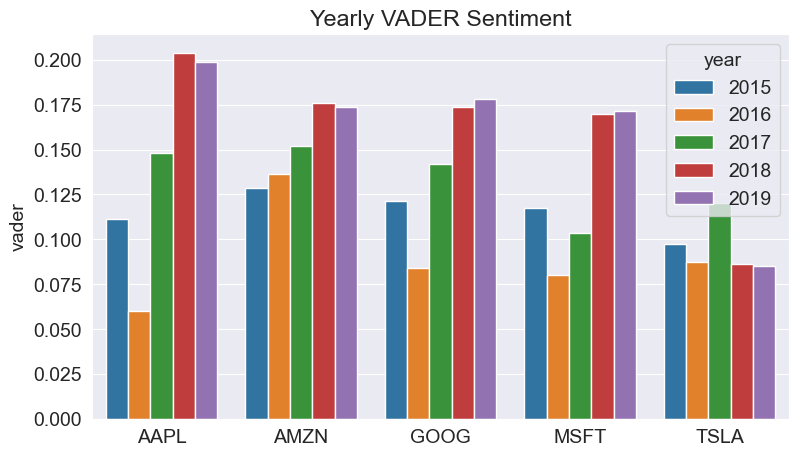

In [32]:
ax = sns.barplot(data=tweets_year_vader,x = 'ticker_symbol',y='vader',hue='year')
ax.set_xlabel('')
ax.set_title('Yearly VADER Sentiment');

One interesting finding is that TSLA was the only company that had an overall downtrend throughout the period. Even the launch of Model 3 in 2017 could only pause the downward trend for one year. This suggests that TSLA may have some challenges in satisfying its customers and maintaining its reputation.

On the other hand, most of the other companies had overall upward sentiment trend. These companies are also important players in the economy, their positive image may contribute to their success and growth.

It is also worth noting that these are some average scores over a big sample size and over the period of a year, all of them ranged between 0.05 and 0.2 which are close to neutral and not very different from each other.

In [33]:
tweets[tweets.vader==0].shape[0]/tweets.shape[0]

0.41759291365959456

Ploting distribution chart for all the vader scores. Scores of 0 will be excluded from this plot as they account for 42% of all scores and would be dominant in the histogram.

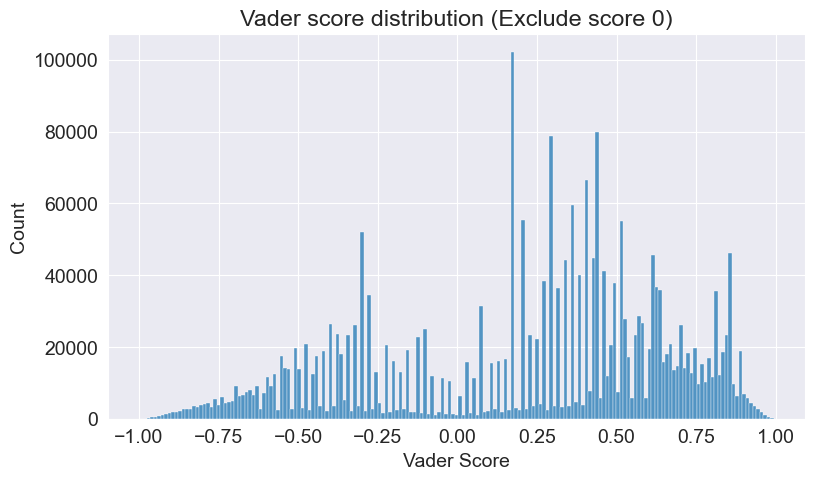

In [34]:
ax = sns.histplot(tweets.vader[tweets.vader!=0])
ax.set_title('Vader score distribution (Exclude score 0)')
ax.set_xlabel('Vader Score');

The distribution of the sentiment scores shows a clear polarization. 

Apart from the dominant 0 scores, which indicate neutral sentiments, most of the scores are either above 0.2 or below -0.2. This suggests that there are more extreme positive and negative sentiments than mild ones. 

However, the average scores for each category are all within 0.05~0.2 range, which means that the overall sentiment is slightly positive. 

Based on the VADER paper cited above, any score above 0.05 can be classified as positive and any score below -0.05 can be classified as negative.

Computing a daily average vader score for each company for each day.

In [35]:
tweets['date'] =pd.to_datetime(pd.DatetimeIndex(tweets.post_date).date)

In [36]:
daily_vader_avg = tweets.groupby(['ticker_symbol','date']).vader.mean().reset_index()
daily_vader_avg

,ticker_symbol,date,vader
0,AAPL,2015-01-01,0.146970
1,AAPL,2015-01-02,0.088376
2,AAPL,2015-01-03,0.239714
3,AAPL,2015-01-04,0.228456
4,AAPL,2015-01-05,0.153657
...,...,...,...
9118,TSLA,2019-12-27,0.115820
9119,TSLA,2019-12-28,0.146403
9120,TSLA,2019-12-29,0.092610
9121,TSLA,2019-12-30,0.090975


Use Apple as example

In [37]:
plot_ticker='AAPL'

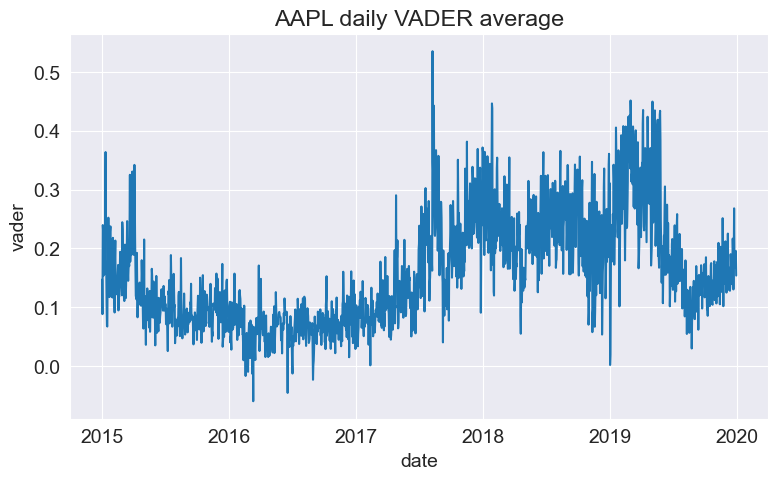

In [38]:
ax = sns.lineplot(daily_vader_avg[daily_vader_avg.ticker_symbol==plot_ticker],x=daily_vader_avg[daily_vader_avg.ticker_symbol==plot_ticker].date,y='vader')
ax.set_title(f'{plot_ticker} daily VADER average');

Still many noises after averaging daily. Let's try a rolling 30 days average.

In [39]:
vader_plot=daily_vader_avg[daily_vader_avg.ticker_symbol==plot_ticker]

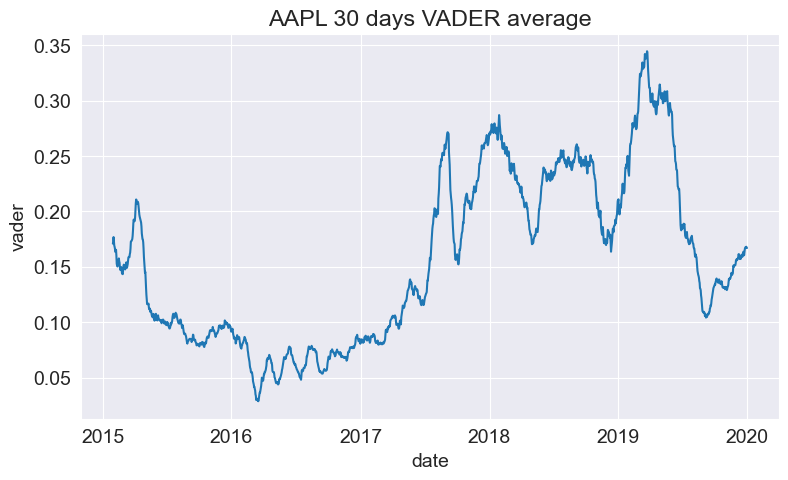

In [40]:
ax = sns.lineplot(vader_plot.rolling(30).mean(),x=vader_plot.date,y='vader')
ax.set_title(f'{plot_ticker} 30 days VADER average');

Filter out tweets without any retweet, like or comment.

In [41]:
active_tweets = tweets[tweets.like_num+tweets.comment_num+tweets.retweet_num!=0]

In [42]:
daily_engaged_vader_avg = active_tweets.groupby(['ticker_symbol','date']).vader.mean().reset_index()

In [43]:
daily_engaged_vader_avg

,ticker_symbol,date,vader
0,AAPL,2015-01-01,0.126477
1,AAPL,2015-01-02,0.087618
2,AAPL,2015-01-03,0.233565
3,AAPL,2015-01-04,0.153539
4,AAPL,2015-01-05,0.121606
...,...,...,...
9117,TSLA,2019-12-27,0.111330
9118,TSLA,2019-12-28,0.122562
9119,TSLA,2019-12-29,0.077045
9120,TSLA,2019-12-30,0.078124


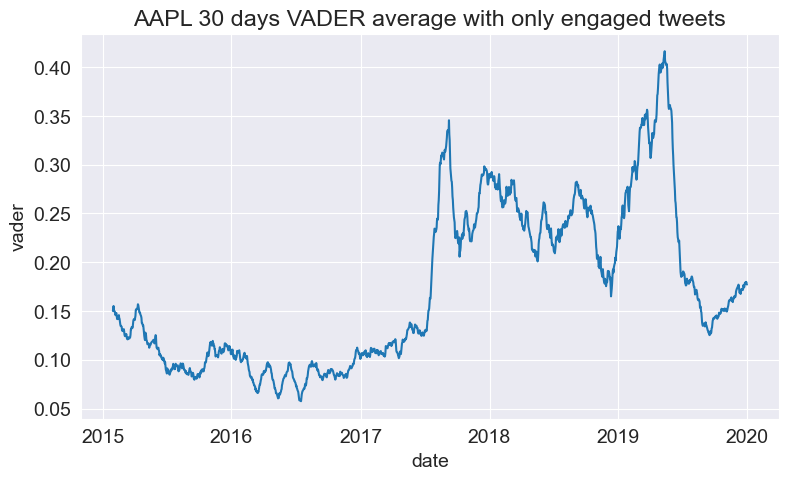

In [44]:
ax = sns.lineplot(daily_engaged_vader_avg[daily_engaged_vader_avg.ticker_symbol==plot_ticker].rolling(30).mean(),x=vader_plot.date,y='vader')
ax.set_title(f'{plot_ticker} 30 days VADER average with only engaged tweets');

This brings down some spikes from former graph especially brings down the spike at early 2018.

Download stock price history

In [45]:
stock_price = yf.download(plot_ticker,start='2015-01-01',end='2019-12-31')['Adj Close'].to_frame()

[*********************100%***********************]  1 of 1 completed


Default timezone for price data is eastern time, which will cause error when merging with a dataframe without timezone. So timezone from price data will be removed.

In [46]:
stock_price.reset_index(inplace=True)
stock_price.Date = stock_price.Date.dt.tz_localize(None)

In [47]:
stock_price

,Date,Adj Close
0,2015-01-02,24.565695
1,2015-01-05,23.873644
2,2015-01-06,23.875885
3,2015-01-07,24.210678
4,2015-01-08,25.140915
...,...,...
1252,2019-12-23,69.451065
1253,2019-12-24,69.517082
1254,2019-12-26,70.896339
1255,2019-12-27,70.869438


Get the direction for price movement everyday

In [48]:
stock_price['change']=stock_price['Adj Close'].pct_change()
stock_price['up']=stock_price['change']>0

In [49]:
stock_price

,Date,Adj Close,change,up
0,2015-01-02,24.565695,NaN,False
1,2015-01-05,23.873644,-0.028171,False
2,2015-01-06,23.875885,0.000094,True
3,2015-01-07,24.210678,0.014022,True
4,2015-01-08,25.140915,0.038423,True
...,...,...,...,...
1252,2019-12-23,69.451065,0.016318,True
1253,2019-12-24,69.517082,0.000951,True
1254,2019-12-26,70.896339,0.019841,True
1255,2019-12-27,70.869438,-0.000379,False


Check if sentiment is going up or down compare to the day before.

In [50]:
daily_engaged_vader_avg['change']=daily_engaged_vader_avg['vader'].pct_change()
daily_engaged_vader_avg['up']=(daily_engaged_vader_avg['change']>0)

In [51]:
daily_engaged_vader_avg

,ticker_symbol,date,vader,change,up
0,AAPL,2015-01-01,0.126477,NaN,False
1,AAPL,2015-01-02,0.087618,-0.307239,False
2,AAPL,2015-01-03,0.233565,1.665703,True
3,AAPL,2015-01-04,0.153539,-0.342629,False
4,AAPL,2015-01-05,0.121606,-0.207978,False
...,...,...,...,...,...
9117,TSLA,2019-12-27,0.111330,-0.081407,False
9118,TSLA,2019-12-28,0.122562,0.100889,True
9119,TSLA,2019-12-29,0.077045,-0.371375,False
9120,TSLA,2019-12-30,0.078124,0.013999,True


Merging two tables for easy comparison

In [52]:
stock_price = stock_price.merge(daily_engaged_vader_avg[daily_engaged_vader_avg.ticker_symbol==plot_ticker],'left',left_on='Date',right_on='date',suffixes=('_price','_vader')).drop(['ticker_symbol','date'],axis=1)

In [53]:
stock_price.dropna(inplace=True)

Ploting a confusion matrix to see if the direction of sentiment changing is actually relavent to direction of price movement each day.

              precision    recall  f1-score   support

       False       0.54      0.63      0.58       587
        True       0.62      0.53      0.57       666

    accuracy                           0.58      1253
   macro avg       0.58      0.58      0.58      1253
weighted avg       0.58      0.58      0.57      1253



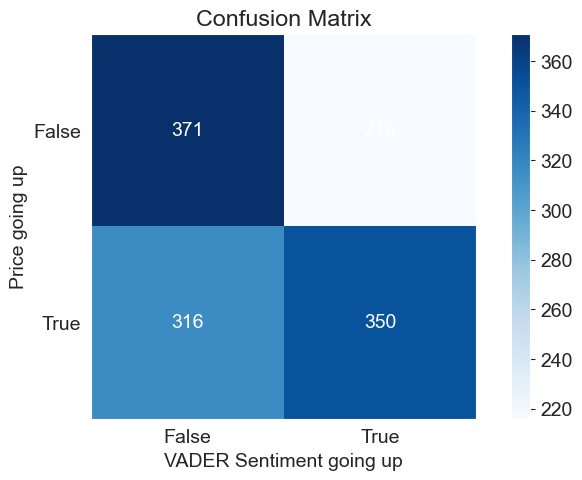

In [54]:
from scikitplot.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(stock_price.up_price, stock_price.up_vader.astype(bool)))
ax = plot_confusion_matrix(stock_price.up_price,stock_price.up_vader.astype(bool))
ax.set_ylabel('Price going up')
ax.set_xlabel('VADER Sentiment going up');

The sentiment prediction achieved a true positive rate of 53% and a true negative rate of 63%, resulting in an overall accuracy of 58%.

Although this accuracy is not very high, it suggests that there might be some positive correlation between the sentiment and the price movement.

To measure the strength and direction of this correlation, a Spearman test will be performed instead of a Pearson test, as the relationship between the variables might not be linear.

In [55]:
from scipy import stats

In [56]:
pd.DataFrame([
stats.spearmanr(stock_price['Adj Close'],stock_price.vader,nan_policy='omit'),
stats.spearmanr(stock_price.change_price,stock_price.change_vader,nan_policy='omit'),
stats.spearmanr(stock_price.up_price,stock_price.up_vader.astype(bool),nan_policy='omit')],
columns=['Correlation Coefficient','p-value'],index=['Price vs. VADER','Percetage change of price vs. Percentage change of VADER','Direction of price movement vs. Direction of VADER movement'])

,Correlation Coefficient,p-value
Price vs. VADER,0.672555,9.303694e-166
Percetage change of price vs. Percentage change of VADER,0.230441,1.452033e-16
Direction of price movement vs. Direction of VADER movement,0.157978,1.889696e-08


P-value for all three tests are extremely small meaning the correlation is statistically significant.

Among all tests the Price vs. VADER correlation is strongest. Plotting both lines.

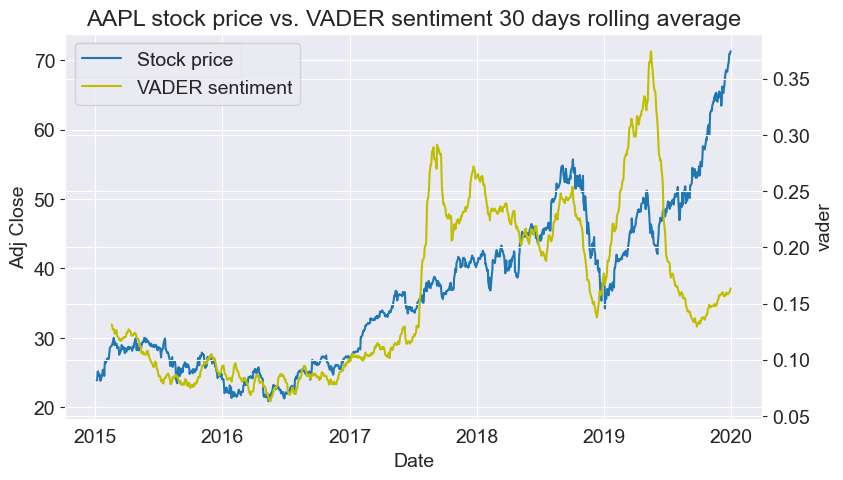

In [57]:
ax1 = sns.lineplot(y=stock_price['Adj Close'],x=stock_price.Date,label='Stock price')
ax2 = plt.twinx()
sns.lineplot(y=stock_price.vader.rolling(30).mean(),x=stock_price.Date,color='y',ax=ax2,label='VADER sentiment')
ax2.set_title(f'{plot_ticker} stock price vs. VADER sentiment 30 days rolling average')

#combine labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0);

### Supervised Machine Learning Method

#### Logistic regression model

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [59]:
stock_price

,Date,Adj Close,change_price,up_price,vader,change_vader,up_vader
1,2015-01-05,23.873644,-0.028171,False,0.121606,-0.207978,False
2,2015-01-06,23.875885,0.000094,True,0.131665,0.082719,True
3,2015-01-07,24.210678,0.014022,True,0.158861,0.206550,True
4,2015-01-08,25.140915,0.038423,True,0.172510,0.085922,True
5,2015-01-09,25.167877,0.001072,True,0.126673,-0.265707,False
...,...,...,...,...,...,...,...
1252,2019-12-23,69.451065,0.016318,True,0.150206,-0.223689,False
1253,2019-12-24,69.517082,0.000951,True,0.211800,0.410064,True
1254,2019-12-26,70.896339,0.019841,True,0.178785,-0.355188,False
1255,2019-12-27,70.869438,-0.000379,False,0.164277,-0.081146,False


Model response has to be categorical, so the direciton of price movement is used.

Use four years of data as the training set and one year of data as the test set. 

In [60]:
price_train, price_test, vader_train, vader_test =train_test_split(stock_price.up_price, stock_price.change_vader, test_size=0.2,random_state=42)

Fit the model

In [61]:
clf = LogisticRegression()
clf.fit(vader_train.values.reshape(-1,1), price_train)

LogisticRegression()

Predict the price using test set

In [62]:
price_pred=clf.predict(vader_test.values.reshape(-1,1))

              precision    recall  f1-score   support

       False       0.56      0.48      0.51       111
        True       0.63      0.70      0.66       140

    accuracy                           0.60       251
   macro avg       0.59      0.59      0.59       251
weighted avg       0.60      0.60      0.60       251



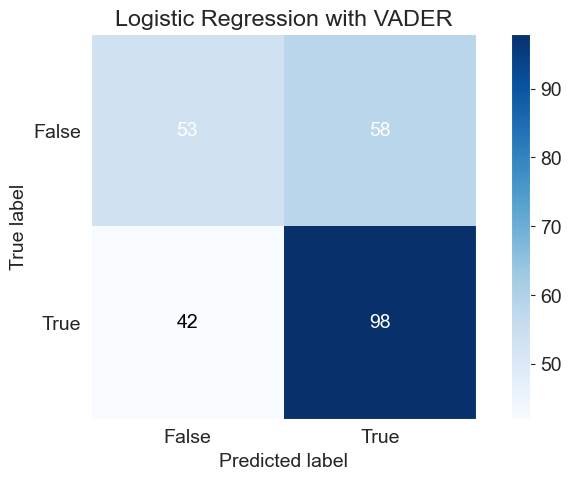

In [63]:
print(classification_report(price_test, price_pred))
plot_confusion_matrix(price_test,price_pred,title='Logistic Regression with VADER');

The true positive rate of the model increased to 70%, which indicates an improvement in predicting the correct direction of the stock price. 

However, this also came with a trade-off of producing more false positives, which means predicting a positive direction when the actual direction was negative. 

A possible explanation for this phenomenon is that the stock price had an overall upward trend during the testing period, and the model tended to overfit on this pattern and ignore other features. 

The total accuracy of the model was similar to using the direction of VADER sentiment as the direction of the price.

#### NLP without VADER

Combine active tweets for each day into a single long tweet for analysis.

In [64]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [65]:
tweets_daily = active_tweets[active_tweets.ticker_symbol==plot_ticker].groupby('date').body.agg(' '.join)

Join with direction of price movement and remove superfluous columns

In [66]:
tweets_daily = stock_price.join(tweets_daily,on=stock_price.Date)[['Date','up_price','body']]

Leave only English word charactors.

In [67]:
tweets_daily.body.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

In [68]:
tweets_daily

,Date,up_price,body
1,2015-01-05,False,I banked over in gains during my day t...
2,2015-01-06,True,Logging in now to live stock chat http optio...
3,2015-01-07,True,AAPL Going to gap way up tomorrow will ...
4,2015-01-08,True,AAPL gonna rip tomorrow I m checking out AAP...
5,2015-01-09,True,AAPL i m long Jan calls but not stoked about ...
...,...,...,...
1252,2019-12-23,True,VERB Hedge Funds Have Never Been This Bullis...
1253,2019-12-24,True,Did you buy the dip in AAPL last year tho Tr...
1254,2019-12-26,True,AAPL Apple s iPhone XR outsold every other sm...
1255,2019-12-27,False,POLL what s the best time to buy lots of SPY...


#### Bag of Words
We will use four years of the dataset as our training set and one year as our test set, the same as in the previous section.

In [69]:
price_train, price_test, tweet_train, tweet_test =train_test_split(tweets_daily.up_price, tweets_daily.body, test_size=0.2,random_state=42)

One way to perform feature transformation on tweets is to use count vectorization. 

This method transforms a given text into a vector that represents the frequency of each word or n-gram in the text. An n-gram is a sequence of n words that appear together in the text.

In this case, I will use count vectorization to extract 1-grams, 2-grams and 3-grams from tweets and use them as features for analysis.

In [70]:
vectorizer = CountVectorizer(ngram_range=(1,3))
train_data = vectorizer.fit_transform(tweet_train)

In [71]:
train_data

<1002x5447687 sparse matrix of type '<class 'numpy.int64'>'
	with 12317461 stored elements in Compressed Sparse Row format>

To fit the model, we use logistic regression with the solver of liblinear dual formulation. 

This solver is suitable for our data set because it can handle a large number of features relative to the number of samples. 

In our case, we have 12 million features and only 1200 samples. The default solver of lbfgs would be very slow and inefficient for such a high-dimensional problem.

In [72]:
clf = LogisticRegression(solver='liblinear',dual=True,max_iter=5000,random_state=42)
clf.fit(train_data,price_train)

LogisticRegression(dual=True, max_iter=5000, random_state=42,
                   solver='liblinear')

Vectorizing test tweets.

In [73]:
test_data = vectorizer.transform(tweet_test)

Make the predictions.

In [74]:
price_pred=clf.predict(test_data)

Compare against True label

              precision    recall  f1-score   support

       False       0.65      0.63      0.64       111
        True       0.72      0.74      0.73       140

    accuracy                           0.69       251
   macro avg       0.68      0.68      0.68       251
weighted avg       0.69      0.69      0.69       251



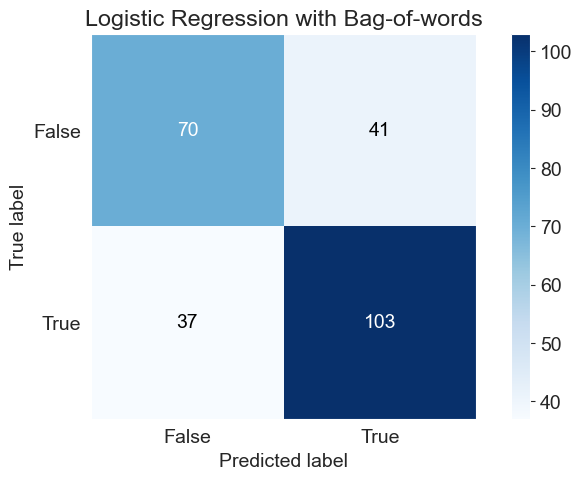

In [75]:
print(classification_report(price_test, price_pred))
plot_confusion_matrix(price_test,price_pred,title='Logistic Regression with Bag-of-words');

The results show that both true positive and true negative rate have increased, leading to a higher accuracy in predicting the stock movement.

Compared to logistic regression with VADER, the main advantage of using bag-of-words is that it can better capture the negative sentiment and avoid false positives.

VADER seems to be more optimistic and less sensitive to negative words than bag-of-words when applied to logistic regression.

### Naive Bayes, Random Forest and Support Vector Machines

Naive Bayes, Random Forest and Support Vector Machines are other popular machine learning models for text classification.

Naive Bayes is a probabilistic model that assumes independence among the features and assigns a class label based on the likelihood of observing the features given the class.

Random Forest is an ensemble model that combines multiple decision trees and uses majority voting to predict the class label.

Support Vector Machines are a linear model that finds a hyperplane that separates the data into different classes with maximum margin.

All these models have different strengths and weaknesses and can be applied to various text classification tasks depending on the data and the problem domain.

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.svm import SVC

#### Random Forest

              precision    recall  f1-score   support

       False       0.67      0.41      0.51       111
        True       0.64      0.84      0.73       140

    accuracy                           0.65       251
   macro avg       0.66      0.62      0.62       251
weighted avg       0.65      0.65      0.63       251



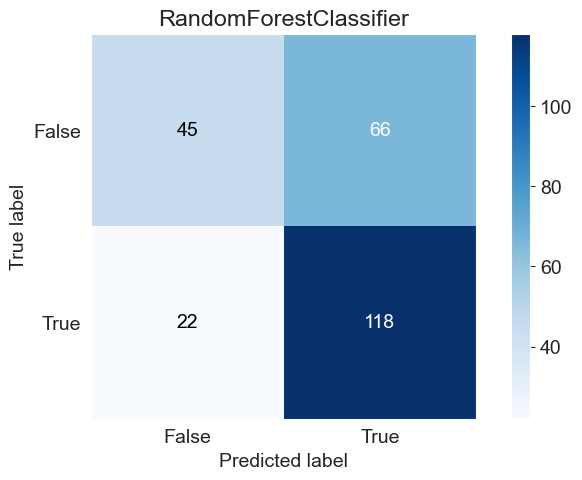

In [77]:
rfc = RandomForestClassifier(criterion='entropy',random_state=42)
rfc.fit(train_data,price_train)
price_pred=rfc.predict(test_data)
print(classification_report(price_test, price_pred))
plot_confusion_matrix(price_test,price_pred,title='RandomForestClassifier');

#### Naive Bayes

              precision    recall  f1-score   support

       False       0.52      0.23      0.31       111
        True       0.58      0.84      0.68       140

    accuracy                           0.57       251
   macro avg       0.55      0.53      0.50       251
weighted avg       0.55      0.57      0.52       251



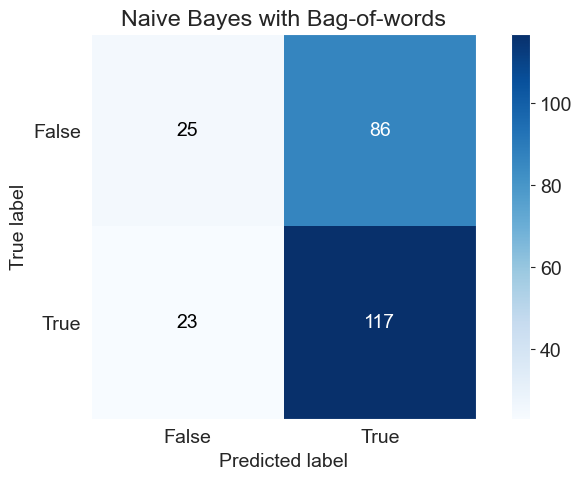

In [78]:
nbc = ComplementNB()
nbc.fit(train_data,price_train)
price_pred=nbc.predict(test_data)
print(classification_report(price_test, price_pred))
plot_confusion_matrix(price_test,price_pred,title='Naive Bayes with Bag-of-words');

Naive Bayes is sometimes used with Term Frequency - Inverse Document Rrequency (TF-IDF) to transform a document to feaure vector

TF-IDF assigns a weight to each word in a document based on how frequently it occurs in the document and how rare it is across all documents. This way, words that are more specific and informative for a document get higher weights than words that are common and less informative.

In [79]:
tfidf=TfidfVectorizer(ngram_range=(1,3))
train_data_tfidf=tfidf.fit_transform(tweet_train)
test_data_tfidf = tfidf.transform(tweet_test)

              precision    recall  f1-score   support

       False       0.00      0.00      0.00       111
        True       0.56      0.99      0.71       140

    accuracy                           0.55       251
   macro avg       0.28      0.50      0.36       251
weighted avg       0.31      0.55      0.40       251



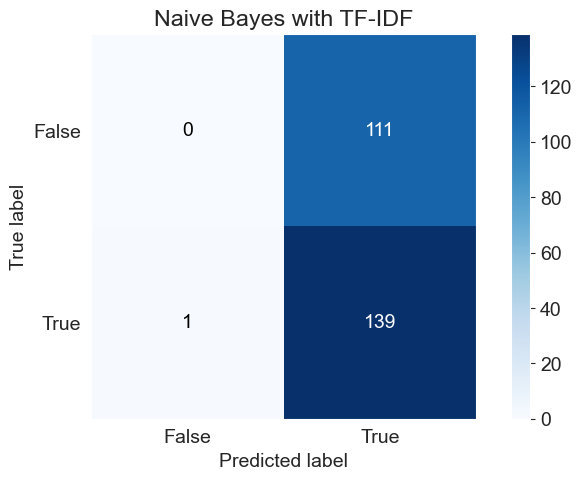

In [80]:
nbc = ComplementNB()
nbc.fit(train_data_tfidf,price_train)
price_pred=nbc.predict(test_data_tfidf)
print(classification_report(price_test, price_pred))
plot_confusion_matrix(price_test,price_pred,title='Naive Bayes with TF-IDF');

Looks like the model always predicted True for all the inputs. We suspect that this is due to the high similarity and overlap of words among the inputs, which belong to a very focused topic. TF-IDF may have removed too much information from the inputs by assigning low weights to common words, leading to underfitting of the model.

#### Support Vector Machines

              precision    recall  f1-score   support

       False       0.62      0.57      0.59       111
        True       0.68      0.73      0.70       140

    accuracy                           0.66       251
   macro avg       0.65      0.65      0.65       251
weighted avg       0.66      0.66      0.66       251



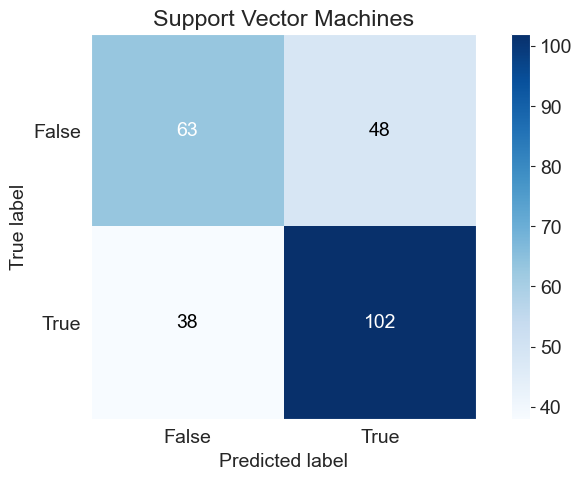

In [81]:
svc = SVC(kernel='linear')
svc.fit(train_data,price_train)
price_pred=svc.predict(test_data)
print(classification_report(price_test, price_pred))
plot_confusion_matrix(price_test,price_pred,title='Support Vector Machines');

## Inferences and Conclusion

The main objective of this study was to examine the relationship between Twitter sentiment and Apple stock price. We used various methods to analyze the tweets and predict the price movement direction.

Our results showed that there was a positive correlation between tweet sentiment and stock price, and that we could achieve about 70% accuracy using tweet sentiment as a predictor. 

We also compared different models for sentiment analysis and found that supervised machine learning models outperformed rule-based models such as VADER. 

Among the supervised models, logistic regression had the highest accuracy but also the longest training time, while SVM and Random Forest had lower accuracy but faster training time. 

Therefore, tweet sentiment can be a useful indicator for stock price prediction, but the choice of model depends on the trade-off between accuracy and speed.


## Future Work

More thorough data cleaning for tweets body could be performed and might improve the quality of this analysis by reducing the noise in the data.

Other models include kNN, Ridge Classifier, log-loss SGD could be used for possible improvement. These models might have different advantages and disadvantages in terms of accuracy, speed and interpretability.

Real time tweets data pipeline could be built so tweets can be collected and analyzed on the fly. This would make this project useful for real time prediction and monitoring of public opinion on various topics.
